In [4]:
import math
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
%matplotlib inline
 

In [40]:
class Value : 
    def __init__(self,data,_children =(),_op='',label=''):
        self.data = data   
        self.grad = 0.0 
        self._backward = lambda : None # empty funtion if it makes sense saying it this way
        self._prev = set(_children)  
        self._op = _op 
        self.label = label 

    def __repr__(self): 
        return f"Value(data={self.data})"   

    def __add__(self,next):  
        ret = Value(self.data+next.data,(self,next),'+') 
        ''' 
            f = a + b 
            df/da  = 1  , df/db = 1 
        '''
        def _backward():   
            self.grad += 1.0*ret.grad
            next.grad += 1.0*ret.grad 
        
        ret._backward = _backward 
        #print(ret)
        return ret   
    
    def __mul__(self,next): 
        
        ''' 
            f = a * b 
            df/da  = b  , df/db = a 
        '''
       
        ret = Value(self.data*next.data,(self,next),'*')  
       
        def _backward() : 
            self.grad += next.data * ret.grad
            next.grad += self.data * ret.grad 
            print()
        
        ret._backward = _backward
        return ret


    def tanh(self):  

        ''' 
            f = tanh(x) 
            df/dx = 1 - tanh(x)*tanh(x)

        '''
        x = self.data
        ret = (math.exp(2*x) - 1) / (math.exp(2*x) + 1) 
        out = Value(ret,(self,),'tanh')  
        def _backward(): 
            self.grad += (1 - ret**2)*out.grad 
        
        out._backward = _backward
        return out

    def backward(self):    
        ord = []
        vis = set() 
        # do a topological sort
        def dfs(v): 
            if v not in vis:   
                vis.add(v)
                for u in v._prev :  
                    dfs(u)
                ord.append(v) 
        
        dfs(self) 

        self.grad = 1.0 
        #print(ord)
        
        for i in reversed(ord) : 
            i._backward()




In [41]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

Value(data=17.0)
Value(data=23.881373587019542)


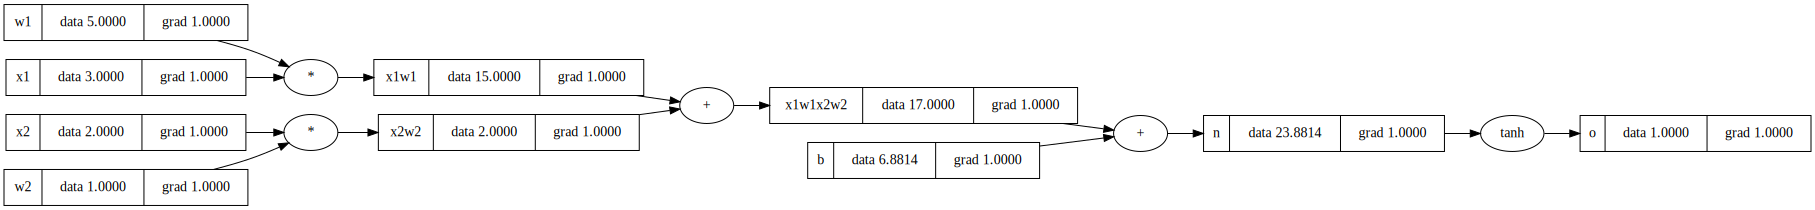

In [42]:
x1 = Value(3.0,label = 'x1') 
w1 = Value(5.0,label = 'w1')
x2 = Value(2.0,label = 'x2')   
w2 = Value(1.0,label = 'w2')

x1w1 = x1*w1  
x1w1.label = 'x1w1' 

b = Value(6.8813735870195432,label = 'b')  #yoinked

x2w2 = x2*w2 
x2w2.label = 'x2w2'

x1w1x2w2 = x1w1  + x2w2  
x1w1x2w2.label = 'x1w1x2w2 '
n = x1w1x2w2 + b  
n.label = 'n' 

o = n.tanh() 
o.label = 'o'  
draw_dot(o) 

Value(data=1.0)
Value(data=23.881373587019542)
Value(data=17.0)
Value(data=2.0)
Value(data=1.0)
Value(data=2.0)
Value(data=15.0)
Value(data=3.0)
Value(data=5.0)
Value(data=6.881373587019543)


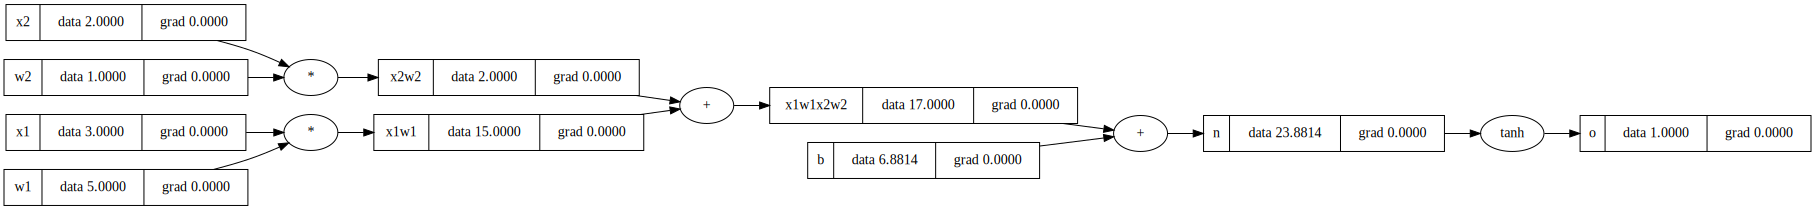

In [33]:
vis = set() 
ord = [] 
def topo(node):  
    if node not in vis : 
        vis.add(node)
        for u in node._prev : 
            topo(u)
        ord.append(node)

topo(o) 

ord  
for i in reversed(ord) : 
    print(i)

draw_dot(o)

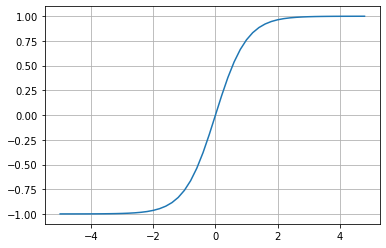

In [9]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

